In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets

In [2]:
data = pd.read_csv("drug200.csv")
X = data.loc[:,('Age', 'Sex', 'Na_to_K')]
X = pd.get_dummies(X, prefix='Sex', columns=['Sex'])
y = data['Drug']
print("Hasil : ", np.unique(y))

Hasil :  ['DrugY' 'drugA' 'drugB' 'drugC' 'drugX']


In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)
print(X[0:5,:])

[[-1.29159102  1.28652212  1.040833   -1.040833  ]
 [ 0.16269866 -0.4151454  -0.96076892  0.96076892]
 [ 0.16269866 -0.82855818 -0.96076892  0.96076892]
 [-0.988614   -1.14996267  1.040833   -1.040833  ]
 [ 1.0110343   0.27179427  1.040833   -1.040833  ]]


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("X Training:", X_train[0:5,:])
print("y Training:",y_train[0:5])

X Training: [[ 0.46567567  2.33663776 -0.96076892  0.96076892]
 [ 0.82924809  3.07561832  1.040833   -1.040833  ]
 [ 0.88984349 -0.30537382  1.040833   -1.040833  ]
 [-0.74623239  1.37242427  1.040833   -1.040833  ]
 [ 1.67758373 -0.20018185  1.040833   -1.040833  ]]
y Training: 131    DrugY
96     DrugY
181    drugX
19     DrugY
153    drugX
Name: Drug, dtype: object


In [5]:
from sklearn.svm import SVC
clf_svc = SVC(kernel='rbf', C=0.1, gamma=1, random_state=0)
clf_svc.fit(X_train, y_train)

SVC(C=0.1, gamma=1, random_state=0)

In [6]:
# print("Koefisien model : ", clf_svc.coef_)
print("Bias model : ", clf_svc.intercept_)
print("Indeks Support Vector : ", clf_svc.support_)
print("Support vector : ", clf_svc.support_vectors_)
print("Jumlah support vector: ",clf_svc.n_support_)
print("Nilai alpha : ", np.abs(clf_svc.dual_coef_))

Bias model :  [ 0.91720109  0.94543086  0.94986192  0.76435302  0.67359585  0.86523788
 -0.97949992  0.71313042 -0.98550051 -1.00160895]
Indeks Support Vector :  [  0   1   5   7  11  15  16  27  32  35  36  37  38  42  44  50  52  54
  56  60  62  63  68  70  73  77  83  84  88  91  94  95  97 103 110 111
 114 119 120 122 130 132 136 139  12  13  14  20  21  41  45  61  64  65
  76  92 105 108 109 123 127 131   6  22  24  28  47  49  53  55  57 101
 102 107 129  23  26  31  34  40  72  74  81  85 112 116 138   2   4   8
   9  10  17  18  29  30  39  46  48  58  66  67  69  75  78  82  87  89
  90  93  98 100 104 106 113 115 117 121 125 126 134 135 137]
Support vector :  [[ 0.46567567  2.33663776 -0.96076892  0.96076892]
 [ 0.82924809  3.07561832  1.040833   -1.040833  ]
 [-0.9280186   1.85480857  1.040833   -1.040833  ]
 [-1.41278182  1.74129005  1.040833   -1.040833  ]
 [ 1.0716297   0.0707083  -0.96076892  0.96076892]
 [ 0.34448487  0.1563329   1.040833   -1.040833  ]
 [-1.29159102 

In [7]:
y_prediksi = clf_svc.predict(X_test)
print(y_prediksi)

['DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY'
 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY'
 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY'
 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'drugX' 'DrugY' 'DrugY' 'DrugY'
 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY'
 'drugX' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY'
 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY']


Akurasi : 51.66666666666667 %


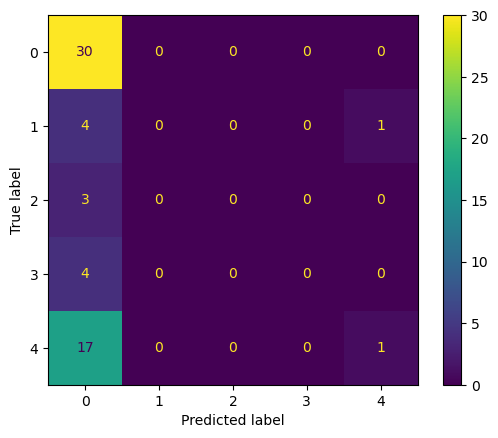

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
cm = confusion_matrix(y_test, y_prediksi)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
akurasi = accuracy_score(y_test, y_prediksi)*100
print("Akurasi : {} %".format(akurasi))